### Steps to build a neural network using Numpy

1. Loading the dataset
2. Defining the architecture (number of inputs, hidden and output neurons)
3. Initializing the weights for all the layers
4. Implementing forward propagation
5. Implementing backward propagation
6. Run the model for n epochs

#### 1. Loading the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#version of numpy
print("Version of Numpy is :", np.__version__)

Version of Numpy is : 1.24.3


In [3]:
#creating the input array
X= np.array([[1,0,1,0],[1,0,1,1], [0,1,0,1]])
print('\n Input:')
print(X)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]


In [4]:
#shape of input array
print('\n Shape of input is :', X.shape)


 Shape of input is : (3, 4)


In [5]:
#converting the input in matrix form
X= X.T
print('\n Input in matrix form:')
print(X)
print('\n Shape of input in matrix form is :', X.shape)


 Input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of input in matrix form is : (4, 3)


In [6]:
# creating the output array
y= np.array([[1],[1],[0]])
print('\n Actual output:')
print(y)
print('\n Shape of output is :', y.shape)


 Actual output:
[[1]
 [1]
 [0]]

 Shape of output is : (3, 1)


In [7]:
#converting the output in matrix form
y= y.T
print('\n Actual output in matrix form:')
print(y)
print('\n Shape of actual output in matrix form is :', y.shape)


 Actual output in matrix form:
[[1 1 0]]

 Shape of actual output in matrix form is : (1, 3)


#### 2. Defining model architecture 


For simplicity, we will just have 1 hidden layer

In [8]:
inputlayer_neurons= X.shape[0] #number of input layer neurons= number of features
hiddenlayer_neurons= 3 #number of hidden layer neurons arbitrarily chosen as 3
output_neurons= 1 #number of neurons in output layer=1 since this is a binary classification

#### 3. Initializing the weights

So we have 4 neurons in the input layer and 3 neurons in the hidden layer. So the shape of the weights matrix from input to the hidden layer will be __4 X 3__.

For simplicity, we are assuming the bias for all the layers is 0.

In [9]:
#initializing weights from input to hidden layer and from hidden layer to output layer
#the shape of w_ih is number of neurons at input x number of neurons at hidden layer
w_ih= np.random.uniform(size= (inputlayer_neurons,hiddenlayer_neurons))

#the shape of w_ho is number of neurons at hidden layer x number of neurons in output layer

w_ho= np.random.uniform(size= (hiddenlayer_neurons, output_neurons))

In [10]:
#shape of weight matrices

print('\n Shape of weight matrix from input to hidden layer is :', w_ih.shape)
print('\n Shape of weight matrix from hidden layer to output is :', w_ho.shape)


 Shape of weight matrix from input to hidden layer is : (4, 3)

 Shape of weight matrix from hidden layer to output is : (3, 1)


#### 4. Implementing Forward Propagation 

We will be using sigmoid as the activation function

In [11]:
#defining the sigmoid activation function
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [12]:
#hidden layer activation: Multiplying the weights with inputs

hidden_layer_input= np.dot(w_ih.T,X) #W(Transpose)*X
hidden_layer_activations= sigmoid(hidden_layer_input)


In [13]:
#calculating output: Multiplying the weights and the hidden layer activations

output_layer_input= np.dot(w_ho.T, hidden_layer_activations)
output= sigmoid(output_layer_input)

In [14]:
output

array([[0.7234586 , 0.73160898, 0.69627291]])

#### 5. Implementing Backward Propagation

In [15]:
#calculating error
error= np.square(y-output)/2

Now we need to calculate the rate of change of error w.r.t weights between hidden and output layer.
In order to calculate this, we need the following.

a. Rate of change of error w.r.t output \
b. Rate of change of output w.r.t Z2 \
c. Rate of change of Z2 w.r.t weights between hidden and output layer

In [16]:
#rate of change of error w.r.t output
error_wrt_output= -(y-output)

#rate of change of output w.r.t Z2
output_wrt_z2= np.multiply(output, (1-output))

#rate of change of Z2 w.r.t weights between hidden layer and output layer
z2_wrt_who= hidden_layer_activations

#checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_z2.shape, z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [17]:
#shape of weights of output layer. 
w_ho.shape

(3, 1)

The final shape of the matrix representing rate of change of error w.r.t weights should be same as w_ho.shape which is (3,1)

In [18]:
error_wrt_who= np.dot(z2_wrt_who, (error_wrt_output*output_wrt_z2).T)
error_wrt_who.shape

(3, 1)

Next, we need to calculate the rate of change of error w.r.t weight between input and hidden layer.

a. Rate of change of error w.r.t output \
b. Rate of change of output w.r.t Z2 \
c. Rate of change of Z2 w.r.t hidden layer activations \
d. Rate of change of hidden layer activations w.r.t Z1 \
e. Rate of change of Z1 w.r.t weights between input and hidden layer

In [19]:
#rate of change of z2 w.r.t hidden layer activations
z2_wrt_h1= w_ho

#rate of change of hidden layer activations w.r.t Z1
h1_wrt_Z1= np.multiply(hidden_layer_activations, (1-hidden_layer_activations))

#rate of change of Z1 w.r.t weights between input and hidden layer
z1_wrt_wih= X

In [20]:
#Checking shapes of the partial derivatives
error_wrt_output.shape, output_wrt_z2.shape,z2_wrt_h1.shape,h1_wrt_Z1.shape, z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [21]:
#shape of weights of input to hidden layer
w_ih.shape

(4, 3)

In [22]:
#rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih= np.dot(z1_wrt_wih,(h1_wrt_Z1*np.dot(z2_wrt_h1,(error_wrt_output*output_wrt_z2))).T)

In [23]:
error_wrt_wih.shape

(4, 3)

#### Updating parameters

In [24]:
#defining the learning rate
lr= 0.01

#initial w_ho and w_ih
w_ho, w_ih

(array([[0.64996043],
        [0.51388979],
        [0.07993118]]),
 array([[0.57094973, 0.53586618, 0.66892688],
        [0.66610122, 0.24952131, 0.63575565],
        [0.68488942, 0.64506294, 0.61739924],
        [0.06600101, 0.3833463 , 0.1597753 ]]))

In [25]:
w_ho= w_ho- lr* error_wrt_who

w_ih= w_ih- lr*error_wrt_wih

In [26]:
w_ho

array([[0.64981281],
       [0.5137872 ],
       [0.07977668]])

In [27]:
w_ih

array([[0.57106871, 0.53595603, 0.66894088],
       [0.66589136, 0.24934989, 0.63573043],
       [0.6850084 , 0.64515279, 0.61741324],
       [0.06584807, 0.38321362, 0.15975658]])

The weight values have been updated. This completes one epoch of our training.

#### 6. Run the model for n epochs

In [28]:
#defining model architecture
inputlayer_neurons= X.shape[0] #number of input layer neurons= number of features
hiddenlayer_neurons= 3 #number of hidden layer neurons arbitrarily chosen as 3
output_neurons= 1 #number of neurons in output layer=1 since this is a binary classification

In [29]:
#Initializing weights
w_ih= np.random.uniform(size= (inputlayer_neurons,hiddenlayer_neurons))
w_oh= np.random.uniform(size= (hiddenlayer_neurons,output_neurons))

In [30]:
#defining the model parameters
lr= 0.01
epochs= 10000

In [31]:
#initial w_ih
w_ih

array([[0.46611722, 0.50344157, 0.26431064],
       [0.90182659, 0.38426831, 0.76935279],
       [0.66208263, 0.73193304, 0.83036647],
       [0.79155548, 0.94633251, 0.35273716]])

In [32]:
#initial w_oh
w_oh

array([[0.49888221],
       [0.46641259],
       [0.69504591]])

In [33]:
error_epoch= []
for i in range(epochs):
    
    #forward propagation
    
    #hidden layer activations
    hidden_layer_input= np.dot(w_ih.T,X) #W(Transpose)*X
    hidden_layer_activations= sigmoid(hidden_layer_input)
    
    #calculating the output
    output_layer_input= np.dot(w_ho.T, hidden_layer_activations)
    output= sigmoid(output_layer_input)
    
    #backward propagation
    
    #calculating the error
    error= np.square(y-output)/2
    error_wrt_output= -(y-output)
    output_wrt_z2= np.multiply(output, (1-output))
    z2_wrt_who= hidden_layer_activations
    #rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who= np.dot(z2_wrt_who, (error_wrt_output*output_wrt_z2).T)
    
    z2_wrt_h1= w_ho
    h1_wrt_Z1= np.multiply(hidden_layer_activations, (1-hidden_layer_activations))
    z1_wrt_wih= X
    #rate of change of error w.r.t weight between input and hidden layer
    error_wrt_wih= np.dot(z1_wrt_wih,(h1_wrt_Z1*np.dot(z2_wrt_h1,(error_wrt_output*output_wrt_z2))).T)
    
    w_ho= w_ho- lr* error_wrt_who
    w_ih= w_ih- lr*error_wrt_wih
    
    error_epoch.append(np.average(error))

In [34]:
w_ih

array([[ 0.92054245,  1.36252332, -0.71136458],
       [-0.02194797, -1.67310105,  1.55558729],
       [ 1.11650787,  1.5910148 , -0.14530875],
       [ 0.05670768, -0.6666213 ,  0.59326131]])

In [35]:
w_oh

array([[0.49888221],
       [0.46641259],
       [0.69504591]])

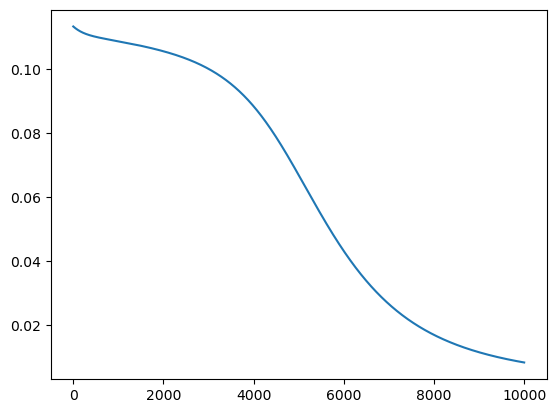

In [36]:
#visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

In [37]:
#final output from the model
output

array([[0.923978  , 0.88792186, 0.17971554]])

In [38]:
#actual target
y

array([[1, 1, 0]])

In [39]:
#error at last epoch
error

array([[0.00288967, 0.00628075, 0.01614884]])